C:\Users\Dell\AppData\Local\Temp\ipykernel_23692\1592737849.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_col, y='Country Name', data=top10, palette='mako')


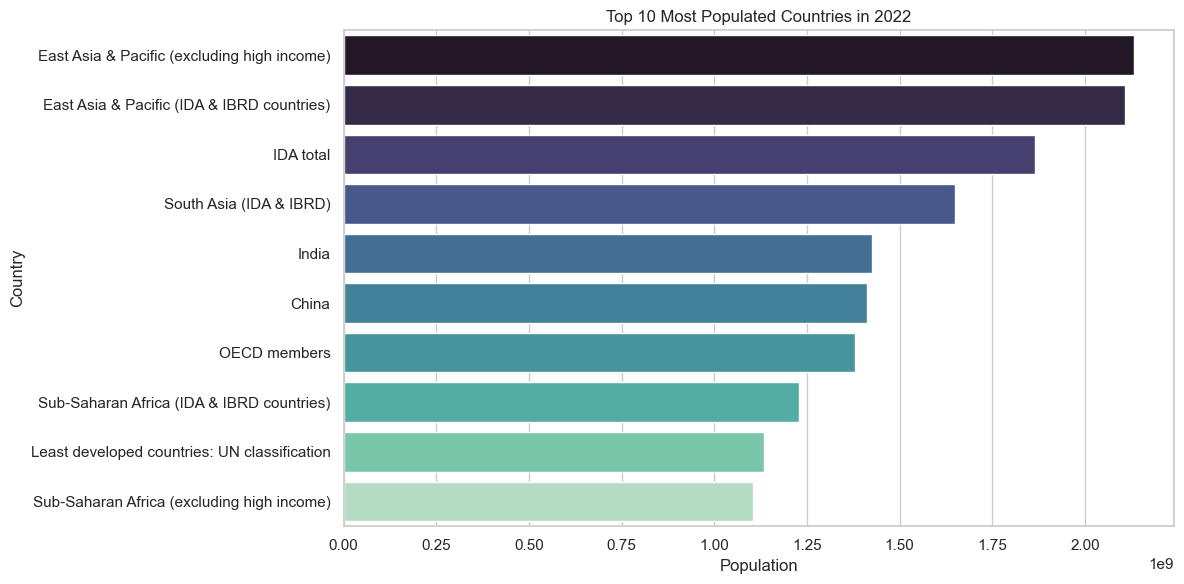

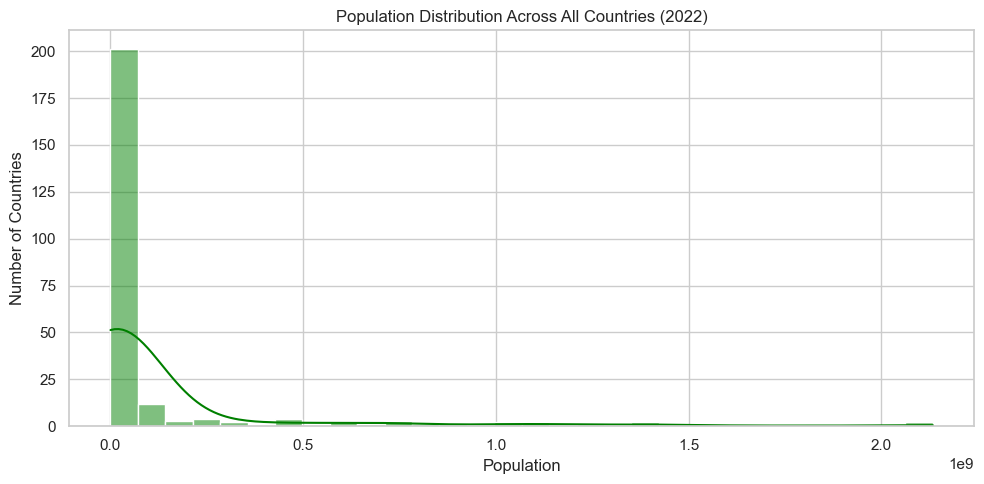

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = r"C:\Users\Dell\Desktop\intership project\Task_01\API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv"

df = pd.read_csv(file, skiprows=4)
df = df.dropna(how='all', axis=1)  

year_col = [col for col in df.columns if '2022' in col][0]
df_2022 = df[['Country Name', year_col]].dropna()
df_2022 = df_2022[df_2022[year_col] > 0]


exclude_regions = [
    'World', 'IDA & IBRD total', 'IBRD only', 'IDA only',
    'Low income', 'Lower middle income', 'Middle income', 'Upper middle income',
    'High income', 'Low & middle income',
    'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean',
    'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa',
    'Early-demographic dividend', 'Late-demographic dividend', 'Post-demographic dividend'
]
df_2022 = df_2022[~df_2022['Country Name'].isin(exclude_regions)]


top10 = df_2022.sort_values(by=year_col, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=year_col, y='Country Name', data=top10, palette='mako')
plt.title('Top 10 Most Populated Countries in 2022')
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_2022[year_col], bins=30, kde=True, color='green')
plt.title('Population Distribution Across All Countries (2022)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()
